### df저장

In [1]:
# from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [2]:
df_ais = pd.read_csv('aisles.csv')
df_dep = pd.read_csv('departments.csv')
df_ord_prod = pd.read_csv('order_products__prior.csv')
df_ord_tr = pd.read_csv('order_products__train.csv')
df_ords = pd.read_csv('orders.csv')
df_prod = pd.read_csv('products.csv')


In [3]:
print("aisles.csv Missing values : ",df_ais.isnull().values.sum())
print("departments.csv Missing values : ",df_dep.isnull().values.sum())
print("order_products__prior.csv Missing values : ",df_ord_prod.isnull().values.sum())
print("order_products__train.csv Missing values : ",df_ord_tr.isnull().values.sum())
print("orders.csv Missing values : ",df_ords.isnull().values.sum())
print("products.csv Missing values : ",df_prod.isnull().values.sum())

aisles.csv Missing values :  0
departments.csv Missing values :  0
order_products__prior.csv Missing values :  0
order_products__train.csv Missing values :  0
orders.csv Missing values :  206209
products.csv Missing values :  0


### aisles.csv EDA

In [4]:
df_ais.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [5]:
df_ais.duplicated().sum()

0

In [6]:
df_ais.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
df_ais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


aisle - 상품의 소분류 정도로 기억해야겠다

aisle이 있는 데이터 프레임 -> df_prod

In [8]:
print("소분류 ID :",df_ais.aisle_id.nunique(),"개")
print("소분류 종류 :",df_ais.aisle.nunique(),"개")

소분류 ID : 134 개
소분류 종류 : 134 개


### departments.csv EDA

In [9]:
df_dep.tail()


,department_id,department
16,17,household
17,18,babies
18,19,snacks
19,20,deli
20,21,missing


In [10]:
df_dep.isnull().sum()

department_id    0
department       0
dtype: int64

In [11]:
df_dep.duplicated().sum()

0

In [12]:
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [13]:
print("대분류 ID :",df_dep.department_id.nunique(),"개")
print("대분류 종류 :",df_dep.department.nunique(),"개")

대분류 ID : 21 개
대분류 종류 : 21 개


### order_products__prior.csv EDA

In [14]:
df_ord_prod.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [15]:
df_ord_prod.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [16]:
df_ord_prod.duplicated().sum()

0

In [17]:
df_ord_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [18]:
print("주문 정보 :",df_ord_prod.order_id.nunique(),"개")
print("상품 갯수 :",df_ord_prod.product_id.nunique(),"개")
print("카트 추가 순서 :",df_ord_prod.add_to_cart_order.nunique(),"가지")
print("재주문 상품 :",df_ord_prod.reordered.nunique(),"가지")

주문 정보 : 3214874 개
상품 갯수 : 49677 개
카트 추가 순서 : 145 가지
재주문 상품 : 2 가지


In [19]:
# for x in df_ord_prod.columns:
#     print(x,"갯수 :",df_ord_prod[x].nunique())

### order_products__train.csv EDA

In [20]:
df_ord_tr.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [21]:
df_ord_tr.duplicated().sum()

0

In [22]:
df_ord_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


### orders.csv EDA

In [23]:
df_ords.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [24]:
df_ords.days_since_prior_order

0           NaN
1          15.0
2          21.0
3          29.0
4          28.0
           ... 
3421078    29.0
3421079    30.0
3421080    18.0
3421081     7.0
3421082    30.0
Name: days_since_prior_order, Length: 3421083, dtype: float64

In [25]:
df_ords.duplicated().sum()

0

In [26]:
# df_ords = df_ords.dropna()
# df_ords = df_ords.reset_index()


In [27]:
df_ords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [28]:
df_ords.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [29]:
df_ords.shape

(3421083, 7)

In [30]:
print("유저 수 :",df_ords.user_id.nunique(),"명")
print("eval set :",df_ords.eval_set.nunique(),"개")
print("유저 누적 주문 수 :",df_ords.order_number.nunique(),"가지")
print("주문 요일 :",df_ords.order_dow.nunique(),"가지")
print("주문 시간 :",df_ords.order_hour_of_day.nunique(),"가지")
print("주문 텀 :",df_ords.days_since_prior_order.nunique(),"가지")

유저 수 : 206209 명
eval set : 3 개
유저 누적 주문 수 : 100 가지
주문 요일 : 7 가지
주문 시간 : 24 가지
주문 텀 : 31 가지


### products.csv EDA

In [31]:
df_prod.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [32]:
df_prod.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [33]:
df_prod.duplicated().sum()

0

In [34]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [35]:
print("제품 ID :",df_prod.product_id.nunique(),"개")
print("제품명 :",df_prod.product_name.nunique(),"가지")

제품 ID : 49688 개
제품명 : 49688 가지


### 뭘 도출할수 있는가

orders.csv 데이터에서 
1. order number로 얼마나 자주 이용하는지
2. order dow로 무슨 요일에 사람들이 자주 사용하는지
3. order_hour로 어느 시간대에 사람들이 가장 많이 사용하는지
4. order dow와 hour로 요일별 어느 시간대에 사람들이 가장 많이 사용하는지
5. 재주문까지 얼마나 걸리는가
6. 주문수가 가장 많은건 무엇인가

사실상 배민같은 회사, 코로나 덕분에 성장했다

국내 트렌드 리포트를 적용할수 있을진 모르겠다
1. 어떤 품목들을 자주 구매하는가
2. 주문할때 주문 비율이 높은 품목은 무엇인가
3. 고객별 주문수(위의 1번과 동일)
4. 묶음 판매? 뭐랑 같이 잘 팔릴까(근데 한번에 한개씩만 주문이 넣어져서 확인 할수가없다)
5. 재주문율 높은 식품종류들

인스타카트는 빠른 배달 서비스에 중점을 두고있다
한국의 쿠팡, 마켓컬리, 이마트몰과 비슷한 인스타카트
1. -> 자주 구매 하는 품목에 할인하는 것이 사람들을 더 끌어 모을까
2. -> 

In [36]:
df_ords.user_id.value_counts().describe() 
# 평균적으로 16번의 주문
# 최소 4번씩은 주문
# 

count    206209.000000
mean         16.590367
std          16.654774
min           4.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: user_id, dtype: float64

Text(0.5, 0, 'Number of Orders')

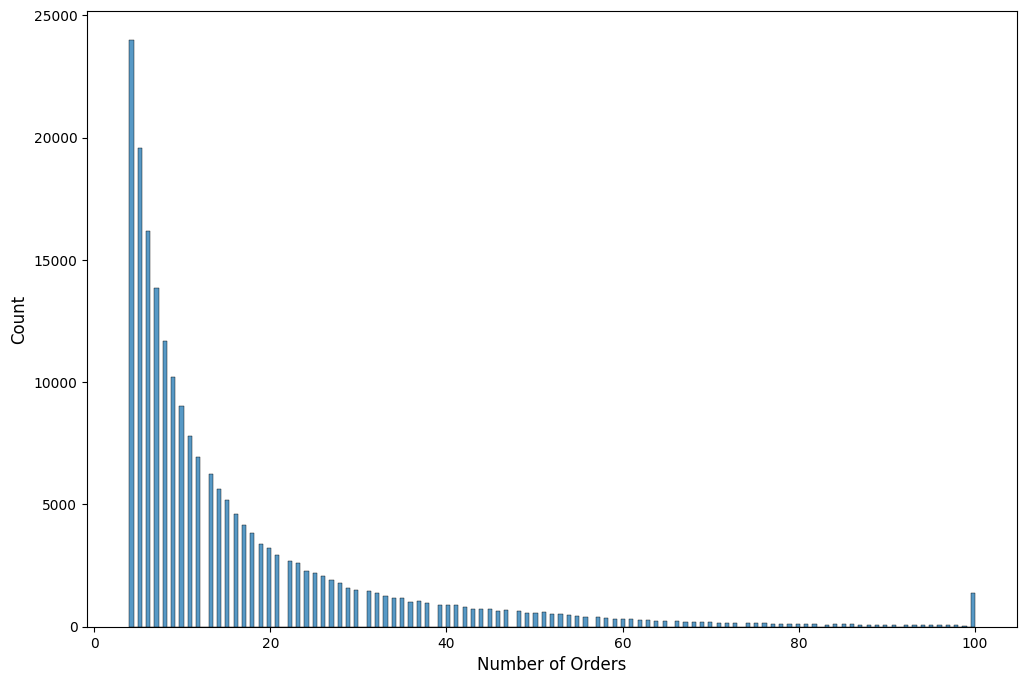

In [37]:
plt.figure(figsize=(12,8))
sns.histplot(df_ords.user_id.value_counts())
plt.ylabel('Count', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)

<AxesSubplot: >

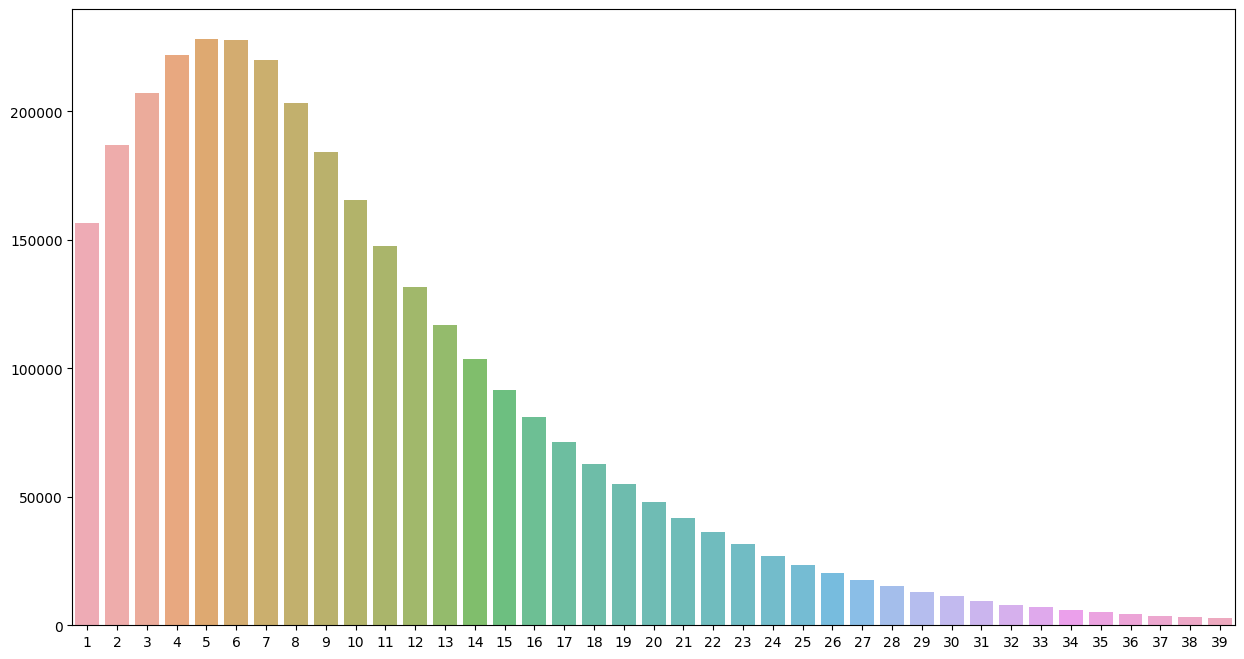

In [38]:

grouped_df = df_ord_prod.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
count_ord = grouped_df[grouped_df.add_to_cart_order<40].add_to_cart_order.value_counts()

plt.figure(figsize=(15,8))
sns.barplot(x=count_ord.index, y=count_ord.values, alpha=0.8)

한번 주문할때 5~6개를 카트에 넣는 사람이 제일 많았고, 평균적으로 한번 주문할때 10개를 담는 모습을 확인

In [39]:
grouped_df['add_to_cart_order'].describe()

count    3.214874e+06
mean     1.008888e+01
std      7.525398e+00
min      1.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.400000e+01
max      1.450000e+02
Name: add_to_cart_order, dtype: float64

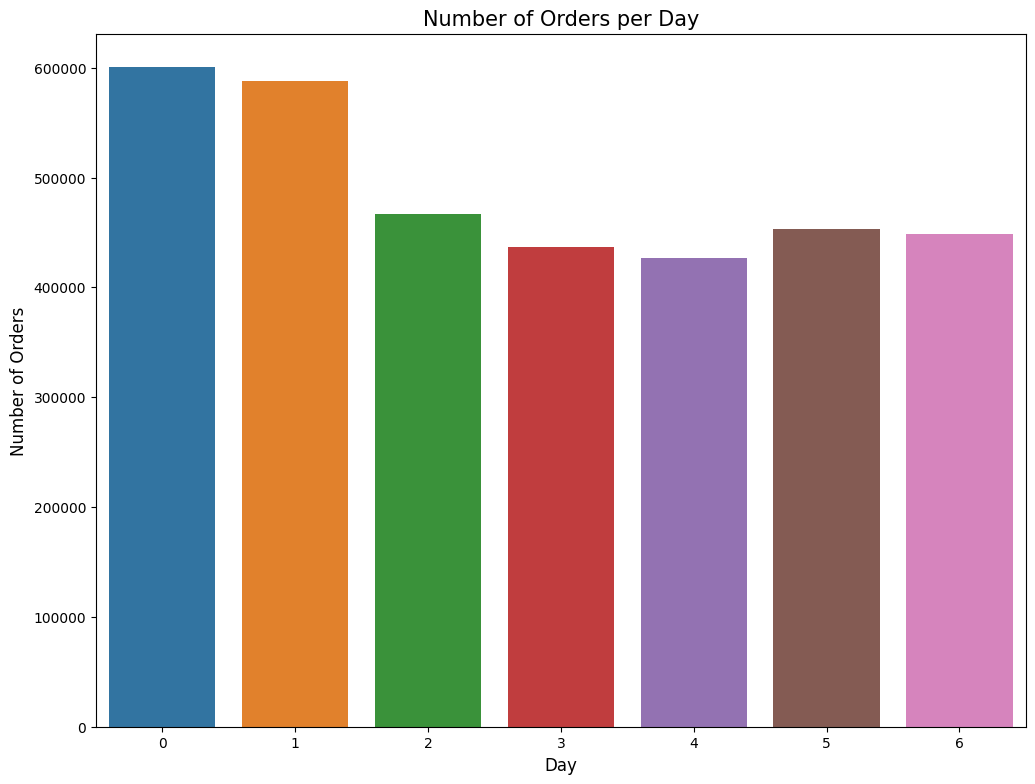

In [40]:
plt.figure(figsize=(12,9))
sns.countplot(x = 'order_dow' ,data = df_ords)
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.title('Number of Orders per Day', fontsize=15);

Day:0,1 에 가장 많은 사람들이 이용하고 3,4에 상대적으로 적게 이용

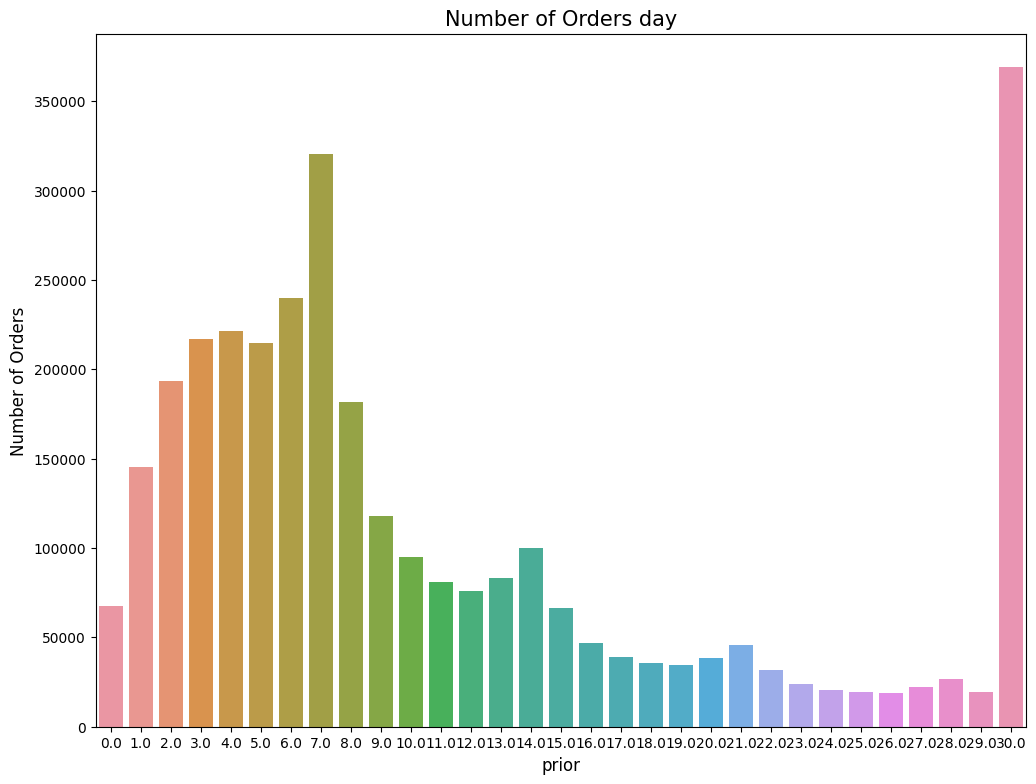

In [41]:
plt.figure(figsize=(12,9))
sns.countplot(x = 'days_since_prior_order' ,data = df_ords)
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('prior', fontsize=12)
plt.title('Number of Orders day', fontsize=15);

재주문 텀으로는 30일, 약 한달간의 텀을 두고 이용하는 고객들이 가장 많았고 두번째로 7일, 1주 간격으로 구매를 많이했다

30일을 제외하곤 구매후 1~7일 사이에 이용 고객이 대다수 포진

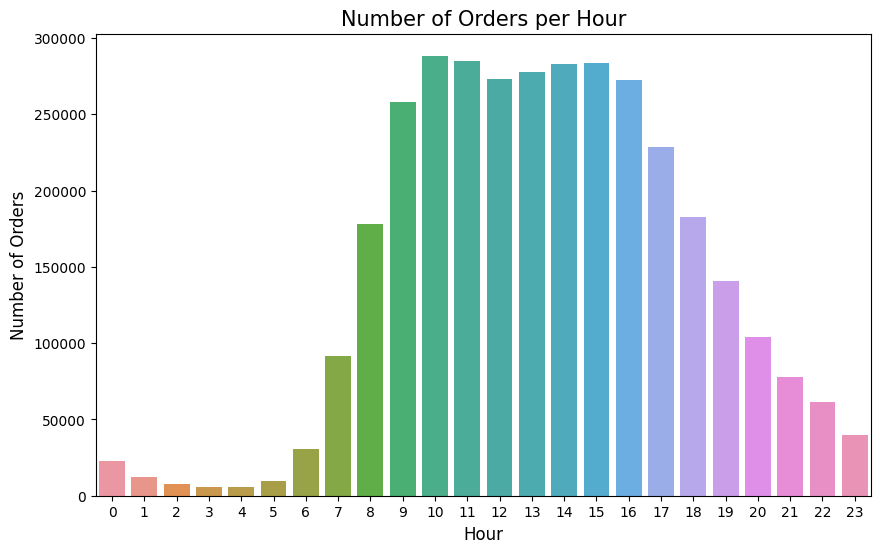

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'order_hour_of_day' ,data = df_ords)
# sns.countplot(x = 'order_hour_of_day' ,data = df_ords[df_ords.order_dow==6])
# 요일 별로 시간대에 별 차이는 보이지 않았다.
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.title('Number of Orders per Hour', fontsize=15);

이용 시간으로는 9시~16시 사이에 가장 많이 이용했고 ?%의 고객들이 이 사이에 분포 -> ? 구하기, 점심,저녁시간에 구매하는 분포가 다를것인가

In [43]:
df_ords.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


<AxesSubplot: xlabel='order_hour_of_day', ylabel='order_dow'>

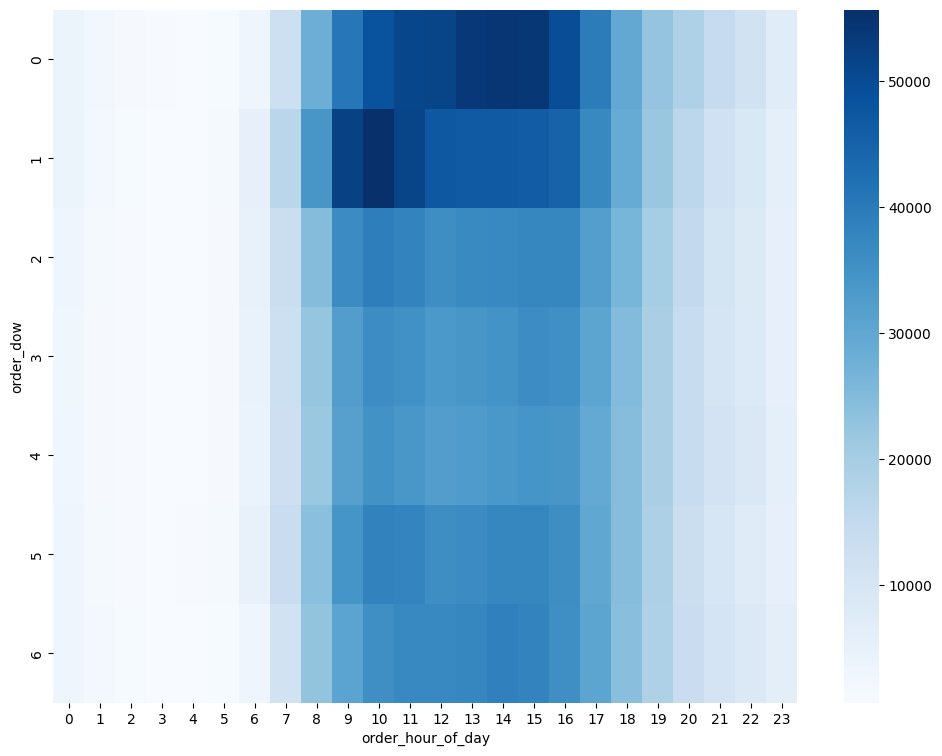

In [44]:
grouped_df = df_ords.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
plt.figure(figsize=(12,9))

sns.heatmap(grouped_df,cmap='Blues')

Day0 과 Day1과의 고객 분포가 차이가 존재함 -> 이유? 뭘 사는지를 한번 봐야할듯

In [45]:
df_ord_tr.product_id.value_counts()

24852    18726
13176    15480
21137    10894
21903     9784
47626     8135
         ...  
42744        1
5871         1
47237        1
9305         1
38900        1
Name: product_id, Length: 39123, dtype: int64

In [46]:
df_prod.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [47]:
print(df_ord_tr.shape)
df_ord_tr.head(15)


(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [48]:
df_ords.head()
# ['order_id','order_dow','order_hour_of_day']

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [49]:
df_ord_prod

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [50]:
df_prod

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


### 데이터 병합

In [51]:
merge_df = pd.merge(df_ord_prod, df_prod, on = 'product_id', how = 'left')
merge_df = pd.merge(merge_df, df_ais, on = 'aisle_id', how = 'left')
merge_df = pd.merge(merge_df, df_dep, on = 'department_id', how = 'left')


In [52]:
merge_df = pd.merge(merge_df,df_ords[['user_id','order_id','order_dow','order_hour_of_day','days_since_prior_order','eval_set']], on = 'order_id', how = 'left')

In [53]:
merge_df.to_csv("merge_df.csv", index = False)

In [54]:
# merge_df = pd.read_csv('merge_df.csv')

In [55]:
merge_df.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,order_dow,order_hour_of_day,days_since_prior_order,eval_set
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,5,9,8.0,prior
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,5,9,8.0,prior
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,5,9,8.0,prior
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,5,9,8.0,prior
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,5,9,8.0,prior
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,202279,5,9,8.0,prior
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry,202279,5,9,8.0,prior
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry,202279,5,9,8.0,prior
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,202279,5,9,8.0,prior
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs,205970,5,17,12.0,prior


In [56]:
merge_df.aisle.value_counts().head(10)

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
Name: aisle, dtype: int64

냉동, 뷰티, 등등 잡다한것들이 하위10개
신선식품, 채소, 유제품, 음료 등등이 상위 10개

In [57]:
merge_df.department.value_counts().head(15)

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
Name: department, dtype: int64

In [58]:
merge_df.product_name.value_counts().head(15)

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Organic Raspberries       137057
Organic Yellow Onion      113426
Organic Garlic            109778
Organic Zucchini          104823
Organic Blueberries       100060
Name: product_name, dtype: int64

In [82]:
m_df = merge_df
m_df['organic'] = merge_df.product_name.str.contains('Organic').astype(np.int8)
m_df['organic'] = m_df['organic'].map({0: 'Non-organic', 1: 'Organic'})
orga = m_df.groupby('order_id')['organic'].aggregate("max").value_counts()

Text(0, 0.5, '% of Orders')

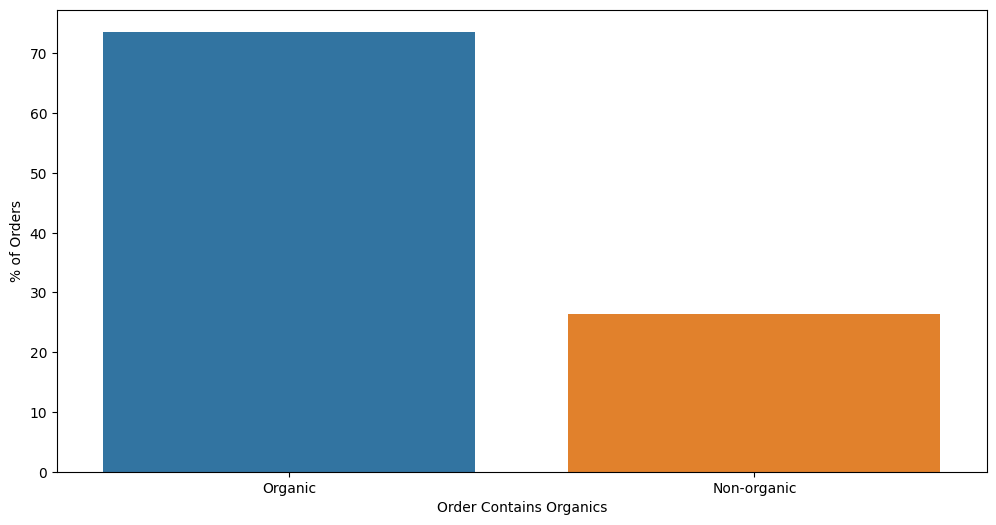

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(x=orga.index, y=orga / orga.sum() * 100)
plt.xticks(rotation='horizontal')
plt.xlabel('Order Contains Organics')
plt.ylabel('% of Orders')

In [81]:
m_df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,order_dow,order_hour_of_day,days_since_prior_order,eval_set,add_to_cart_order_2,organic
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,5,9,8.0,prior,1,Non-organic
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,5,9,8.0,prior,2,Non-organic
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,5,9,8.0,prior,3,Non-organic
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,5,9,8.0,prior,4,Non-organic
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,5,9,8.0,prior,5,Non-organic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household,25247,2,6,21.0,prior,6,Non-organic
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks,25247,2,6,21.0,prior,7,Non-organic
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen,25247,2,6,21.0,prior,8,Non-organic
32434487,3421083,24852,9,1,Banana,24,4,fresh fruits,produce,25247,2,6,21.0,prior,9,Non-organic


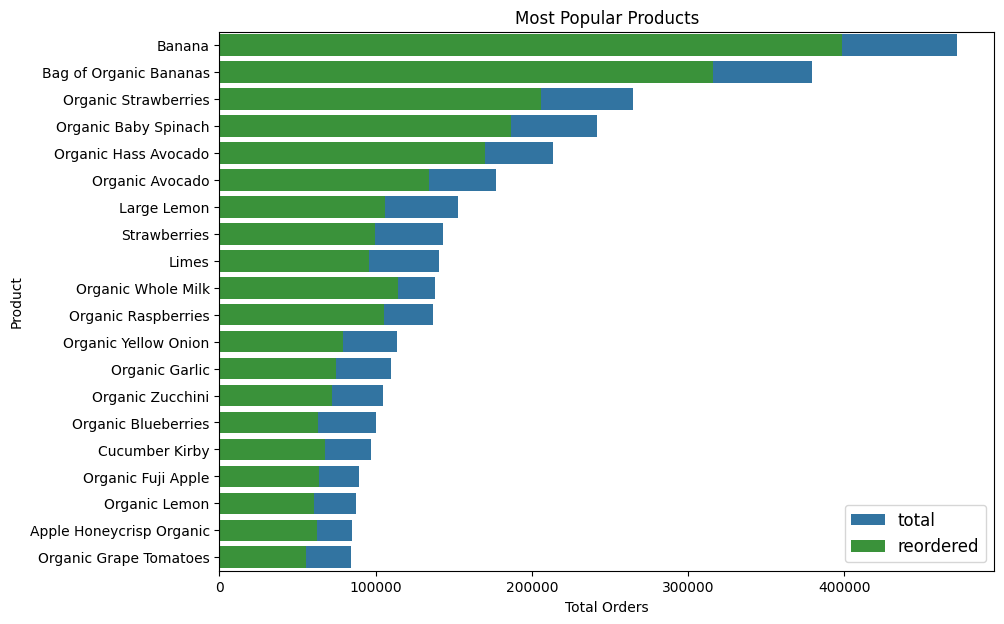

In [59]:
temp_df = merge_df.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'tot','sum':'reorder'})
temp_df = temp_df.sort_values('tot', ascending=False).reset_index()
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.tot[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.reorder[0:20],  color=color[2], label = "reordered")
ax.set_ylabel("Product")
ax.set_xlabel("Total Orders")
ax.set_title("Most Popular Products")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [60]:
temp_df['ratio'] = temp_df['reorder']/temp_df['tot']
temp_df.sort_values('ratio',ascending=False).head(10)

,product_name,tot,reorder,ratio
23522,Raw Veggie Wrappers,68,64,0.941176
21266,Serenity Ultimate Extrema Overnight Pads,87,81,0.931034
39641,Orange Energy Shots,13,12,0.923077
19939,Chocolate Love Bar,101,93,0.920792
30222,Soy Powder Infant Formula,35,32,0.914286
27687,Simply Sleep Nighttime Sleep Aid,45,41,0.911111
34768,"Energy Shot, Grape Flavor",22,20,0.909091
24772,Sparking Water,60,54,0.900000
19996,Maca Buttercups,100,90,0.900000
31726,Russian River Valley Reserve Pinot Noir,30,27,0.900000


In [61]:
temp_df[:20].sort_values('ratio', ascending=False).reset_index()

,index,product_name,tot,reorder,ratio
0,0,Banana,472565,398609,0.843501
1,1,Bag of Organic Bananas,379450,315913,0.832555
2,9,Organic Whole Milk,137905,114510,0.830354
3,4,Organic Hass Avocado,213584,170131,0.796553
4,2,Organic Strawberries,264683,205845,0.777704
5,3,Organic Baby Spinach,241921,186884,0.772500
6,10,Organic Raspberries,137057,105409,0.769089
7,5,Organic Avocado,176815,134044,0.758103
8,18,Apple Honeycrisp Organic,85020,62510,0.735239
9,16,Organic Fuji Apple,89632,63811,0.711922


In [62]:
merge_df[merge_df.department == 'frozen'].product_name.value_counts().head()

Blueberries                        55946
Organic Broccoli Florets           32887
Organic Whole Strawberries         31445
Frozen Organic Wild Blueberries    29905
Pineapple Chunks                   24950
Name: product_name, dtype: int64

Q : Day0 과 Day1과의 고객 분포가 차이가 존재함 -> 이유? 뭘 사는지를 한번 봐야할듯

In [63]:
merge_df[merge_df.order_dow == 0].product_name.value_counts().head(10)

Banana                    96769
Bag of Organic Bananas    71493
Organic Baby Spinach      54914
Organic Strawberries      53831
Organic Hass Avocado      43944
Organic Avocado           39846
Large Lemon               33605
Limes                     30266
Strawberries              27486
Organic Raspberries       26378
Name: product_name, dtype: int64

In [64]:
merge_df[merge_df.order_dow == 1].product_name.value_counts().head(10)

Banana                    87787
Bag of Organic Bananas    69726
Organic Strawberries      46361
Organic Baby Spinach      42277
Organic Hass Avocado      38562
Organic Avocado           32284
Large Lemon               26840
Strawberries              25332
Organic Raspberries       24275
Organic Whole Milk        23298
Name: product_name, dtype: int64

확인해보니 시간대에만 차이있지 주문하는거는 별 다르지않음

Q : 이용 시간으로는 9시~16시 사이에 가장 많이 이용했고 ?%의 고객들이 이 사이에 분포 -> ? 구하기, 점심,저녁시간에 구매하는 분포가 다를것인가

In [65]:
merge_df[merge_df.order_hour_of_day < 9].product_name.value_counts().head(10)

Banana                    54348
Bag of Organic Bananas    44567
Organic Strawberries      31789
Organic Baby Spinach      27123
Organic Hass Avocado      23741
Organic Avocado           18339
Organic Whole Milk        17378
Strawberries              16990
Organic Raspberries       16941
Large Lemon               15685
Name: product_name, dtype: int64

대분류/소분류 종류별로 한번의 주문에 같이 팔리는것..?

In [66]:
merge_df[merge_df['order_id']==2].department.value_counts().head(10)

pantry        5
produce       3
dairy eggs    1
Name: department, dtype: int64

개인화된 식이요법도 주목할 만한 트렌드이다. FMI는 단순히 체중 감량을 위한 식이요법이 줄어들고, 개인화된 음식 규칙이 확대되고 있다고 분석했다. 
각자의 건강 상태에 맞는 식이요법이 각광받는다는 설명이다

높아진 가격 압박으로 소비심리가 위축되고 있지만, 프리미엄 제품에 대한 관심이 높아진 점도 눈에 띄는 현상

FMI는 이유식, 식물성 육류 대체품, 신선식품, 신선 육류와 해산물이 인기 높은 프리미엄 품목들이라고 전했다

식사 준비 속도는 이전보다 빨라지고 있는 것으로 조사됨

위 현상은 요리에 대한 열정이 이전보다 시들해지고 있다는 의미로 볼 수 있으며, 바로 먹을 수 있도록 
준비된 가정간편식 제품이 인기를 끌고 있다는 것을 시사함



한국에서의 Instacart와 비슷한 포지션의 회사로 B마트를 예시로 둘 수 있는데 처음 이용하게 된 계기로 첫주문 쿠폰/이벤트를 하고 있어서 알게 된 경우가 약 30%였고, 외출이 어려운 상황에서 빠르게 받아볼 방법을 찾다가가 2위로 20%정도 그 다음이 소량 구매할 수 있어서, 배달팁 할인을 하고 있어서 순이었다. 

온라인에서 식료품 구매 시에는 제품 신선도/품질이 확실히 보장되는 것이 가장 중요하고,

그 외, 오프라인 대비 할인된 가격, 소량 구매가 가능해야 하는 점을 중요한 요소로 꼽고 있다

오프라인 구매자들은 상품 신선도를 직접 확인할 수 없고, 배송을 기다리는 과정이 불편하며, 원하는 양만큼 구매가 어려워서
온라인 채널에서 식료품을 구매하지 않는다고 한다.

### 재주문 관련

In [67]:
print(df_ords.shape)
print(df_ord_prod.shape)

(3421083, 7)
(32434489, 4)


In [68]:
merge_df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,order_dow,order_hour_of_day,days_since_prior_order,eval_set
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,5,9,8.0,prior
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,5,9,8.0,prior
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,5,9,8.0,prior
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,5,9,8.0,prior
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,5,9,8.0,prior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household,25247,2,6,21.0,prior
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks,25247,2,6,21.0,prior
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen,25247,2,6,21.0,prior
32434487,3421083,24852,9,1,Banana,24,4,fresh fruits,produce,25247,2,6,21.0,prior


In [69]:
df_ords[df_ords.user_id == 3]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
26,1374495,3,prior,1,1,14,NaN
27,444309,3,prior,2,3,19,9.0
28,3002854,3,prior,3,3,16,21.0
29,2037211,3,prior,4,2,18,20.0
30,2710558,3,prior,5,0,17,12.0
31,1972919,3,prior,6,0,16,7.0
32,1839752,3,prior,7,0,15,7.0
33,3225766,3,prior,8,0,17,7.0
34,3160850,3,prior,9,0,16,7.0
35,676467,3,prior,10,3,16,17.0


In [70]:
merge_df2 = pd.merge(df_ord_prod, df_prod[['product_id' ,'aisle_id', 'department_id']], on = 'product_id', how = 'left')
# merge_df2 = pd.merge(merge_df2, df_ais, on = 'aisle_id', how = 'left')
# merge_df2 = pd.merge(merge_df2, df_dep, on = 'department_id', how = 'left')
merge_df2 = pd.merge(merge_df2,df_ords[['user_id','order_id','order_dow','order_hour_of_day','days_since_prior_order','eval_set']], on = 'order_id', how = 'left')

In [71]:
merge_df2[merge_df2['department_id'] == 13].order_id.drop_duplicates() # 주문 목록에 depart id가 13이 포함된 order id

2                 2
31                5
69                9
96               11
113              13
             ...   
32434286    3421055
32434354    3421061
32434420    3421073
32434434    3421076
32434467    3421081
Name: order_id, Length: 1117892, dtype: int64

In [72]:
merge_df2[merge_df2['order_id'] == 2].department_id.value_counts() # order id 별 depart id 종류 카운트

13    5
4     3
16    1
Name: department_id, dtype: int64

예측 -> 
1. 만약 ~~종류의 물품을 산다면 어떠한 종류의 물품을 살 확률이 높다
2. 고객 한번 주문할때 물품 갯수 예측

In [73]:
# pd.DataFrame(merge_df2.groupby(['user_id', 'order_id'])).head(10)

C:\Users\Jo\AppData\Local\Temp\ipykernel_7868\2426022498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df["add_to_cart_order_2"].loc[merge_df["add_to_cart_order_2"]>70] = 70


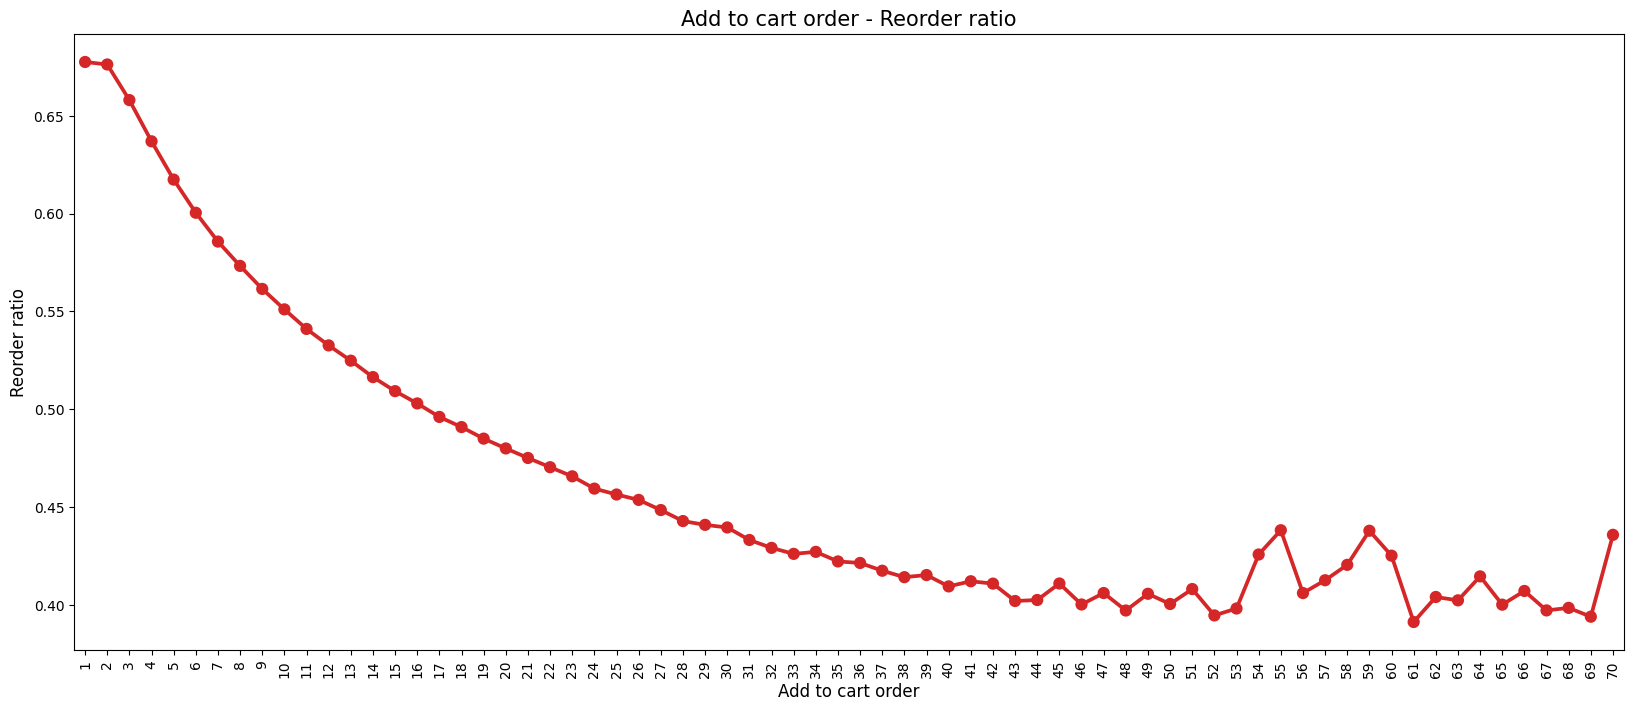

In [74]:
merge_df["add_to_cart_order_2"] = merge_df["add_to_cart_order"].copy()
merge_df["add_to_cart_order_2"].loc[merge_df["add_to_cart_order_2"]>70] = 70
grouped_df = merge_df.groupby(["add_to_cart_order_2"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(20,8))
sns.pointplot(x = grouped_df['add_to_cart_order_2'].values, y = grouped_df['reordered'].values, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

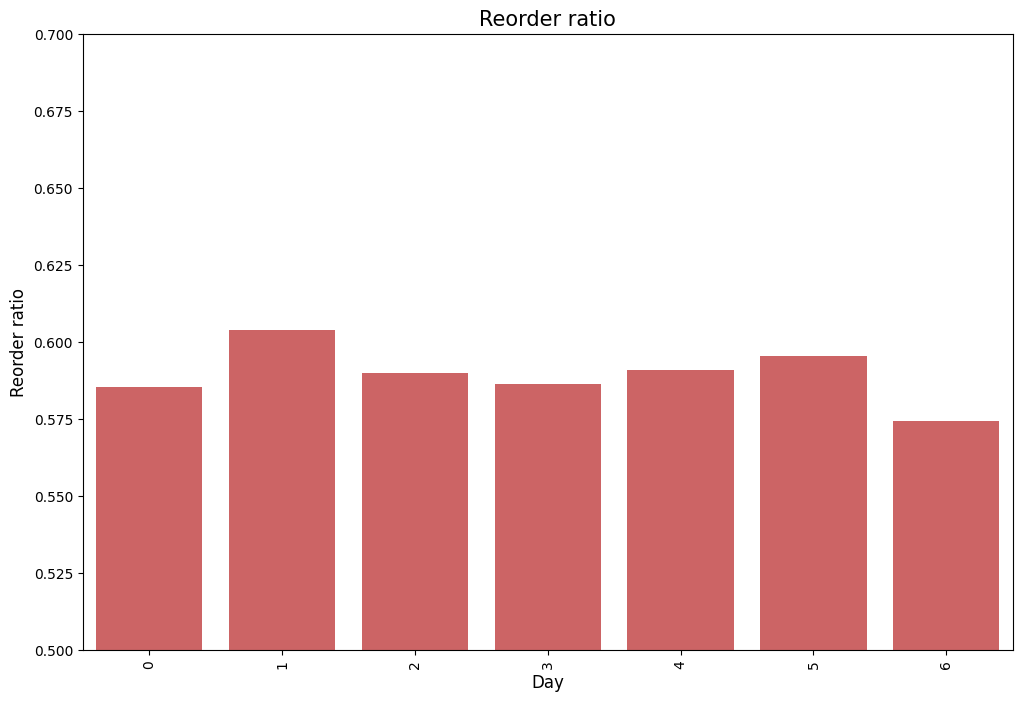

In [75]:
grouped_df = merge_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x = grouped_df['order_dow'].values, y = grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.title("Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

In [76]:
grouped_df

,order_dow,reordered
0,0,0.585276
1,1,0.603843
2,2,0.589771
3,3,0.586272
4,4,0.590979
5,5,0.595470
6,6,0.574369
